In [3]:
# For data manipulation and analysis
import pandas as pd
# For numerical computations
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
# For enhanced visualizations
import seaborn as sns  
# Enable inline plotting for Jupyter Notebooks
#%matplotlib inline


In [2]:
# Load the datasets from specified file paths
customers = pd.read_csv("C:\\Users\\pc\\OneDrive\\Desktop\\Customers.csv")
transactions = pd.read_csv("C:\\Users\\pc\\OneDrive\\Desktop\\Transactions.csv")
products = pd.read_csv("C:\\Users\\pc\\OneDrive\\Desktop\\Products.csv")



## Data Cleaning

In [3]:
# Convert date columns to datetime format for easier analysis
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
# Check for duplicate rows in each dataset
print("Customers duplicates:", customers.duplicated().sum())  
print("Products duplicates:", products.duplicated().sum())  
print("Transactions duplicates:", transactions.duplicated().sum())

Customers duplicates: 0
Products duplicates: 0
Transactions duplicates: 0


In [5]:
# Remove duplicate rows to ensure data integrity
customers.drop_duplicates(inplace=True)  
products.drop_duplicates(inplace=True)  
transactions.drop_duplicates(inplace=True)

In [6]:
# Merge transactions with customers on CustomerID
transactions_customers = transactions.merge(customers, on='CustomerID', how='left')  
# Merge the above with products  
df = transactions_customers.merge(products, on='ProductID', how='left')

In [7]:
# Ensure the price columns from both datasets match
(df['Price_x'] == df['Price_y']).all()

True

In [8]:
# Drop duplicate price column and rename the remaining one
df.drop('Price_y', axis=1, inplace=True)  
df.rename(columns={'Price_x': 'Price'}, inplace=True)

## Exploratory Data Analysis

### Customer Analysis

#### Customers By Region

In [9]:
region_counts = customers['Region'].value_counts()  
print(region_counts)

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


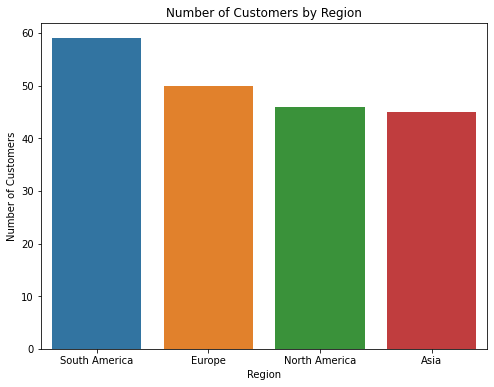

In [10]:
# Plot number of customers by region
plt.figure(figsize=(8,6))  
sns.countplot(x='Region', data=customers, order=region_counts.index)  
plt.title('Number of Customers by Region')  
plt.xlabel('Region')  
plt.ylabel('Number of Customers')  
plt.show()

#### Signupdate Distributions

In [11]:
customers['SignupDate'].min(), customers['SignupDate'].max()

(Timestamp('2022-01-22 00:00:00'), Timestamp('2024-12-28 00:00:00'))

#### Customer SIgn-ups Over Time

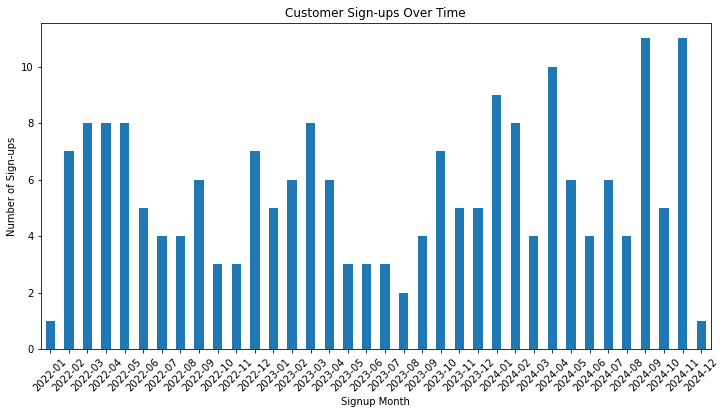

In [12]:
# Customer sign-ups over time (monthly)
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')  
signup_counts = customers['SignupMonth'].value_counts().sort_index()  
# Plot sign-ups over time (monthly) 
plt.figure(figsize=(12,6))  
signup_counts.plot(kind='bar')  
plt.title('Customer Sign-ups Over Time')  
plt.xlabel('Signup Month')  
plt.ylabel('Number of Sign-ups')  
plt.xticks(rotation=45)  
plt.show()

### Product Analysis

#### Products by Category

In [13]:
category_counts = products['Category'].value_counts()  
print(category_counts)

Electronics    26
Books          26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


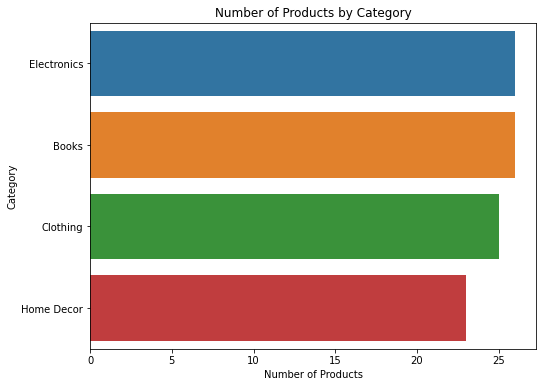

In [14]:
# Plot number of products by category
plt.figure(figsize=(8,6))  
sns.countplot(y='Category', data=products, order=category_counts.index)  
plt.title('Number of Products by Category')  
plt.xlabel('Number of Products')  
plt.ylabel('Category')  
plt.show()

## Price Distribution

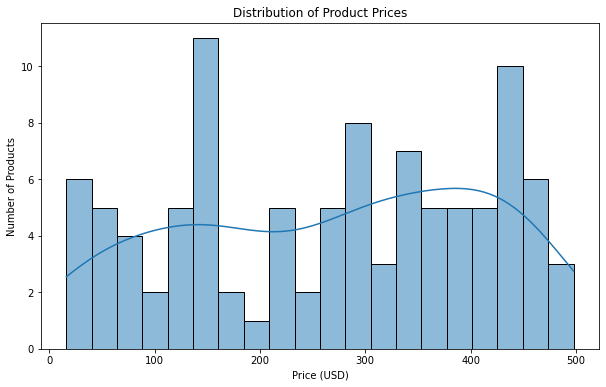

In [15]:
plt.figure(figsize=(10,6))  
sns.histplot(products['Price'], bins=20, kde=True)  
plt.title('Distribution of Product Prices')  
plt.xlabel('Price (USD)')  
plt.ylabel('Number of Products')  
plt.show()

In [ ]:
### Transactions Analysis

#### Transactions Over Time

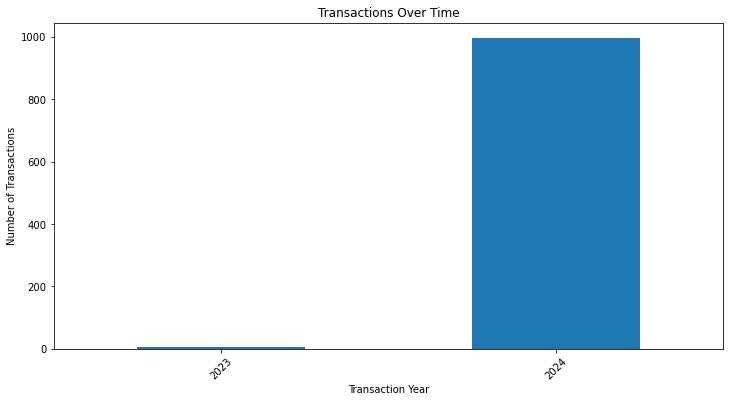

In [16]:
df['TransactionMonth'] = df['TransactionDate'].dt.to_period('Y')  
transactions_over_time = df['TransactionMonth'].value_counts().sort_index()  
  
plt.figure(figsize=(12,6))  
transactions_over_time.plot(kind='bar')  
plt.title('Transactions Over Time')  
plt.xlabel('Transaction Year')  
plt.ylabel('Number of Transactions')  
plt.xticks(rotation=45)  
plt.show()

#### Total Sales Over Time

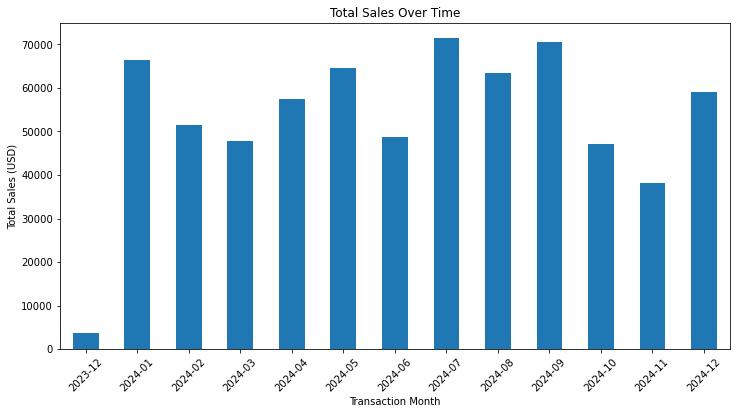

In [18]:
sales_over_time = df.groupby('TransactionMonth')['TotalValue'].sum()  
  
plt.figure(figsize=(12,6))  
sales_over_time.plot(kind='bar')  
plt.title('Total Sales Over Time')  
plt.xlabel('Transaction Month')  
plt.ylabel('Total Sales (USD)')  
plt.xticks(rotation=45)  
plt.show()

### Customer Purchasing Behavior

#### Top Customers by Total Spending

CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


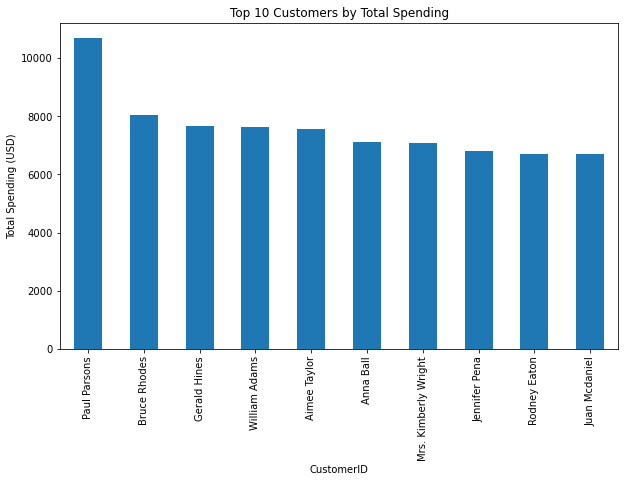

In [19]:
customer_spending = df.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)  
print(customer_spending)
# Plot top 10 customers by spending
plt.figure(figsize=(10,6))  
customer_spending.plot(kind='bar')  
plt.title('Top 10 Customers by Total Spending')  
plt.xlabel('CustomerID')  
plt.ylabel('Total Spending (USD)')  
plt.show()

#### Average Order Value per Customer

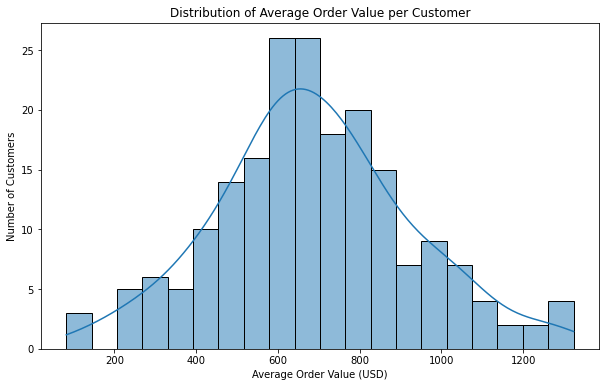

In [20]:
customer_avg_order = df.groupby('CustomerID')['TotalValue'].mean()  
  
plt.figure(figsize=(10,6))  
sns.histplot(customer_avg_order, bins=20, kde=True)  
plt.title('Distribution of Average Order Value per Customer')  
plt.xlabel('Average Order Value (USD)')  
plt.ylabel('Number of Customers')  
plt.show()

### Product Performance


In [21]:
product_quantity = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)  
print(product_quantity)

ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


#### Top Selling Products by Quantity

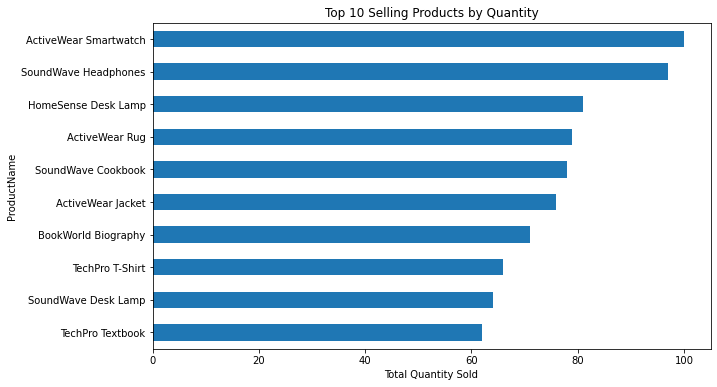

In [22]:
# Plot top 10 products by quantity sold
plt.figure(figsize=(10,6))  
product_quantity.plot(kind='barh')  
plt.title('Top 10 Selling Products by Quantity')  
plt.xlabel('Total Quantity Sold')  
plt.ylabel('ProductName')  
plt.gca().invert_yaxis()  
plt.show()

#### Top Selling Products by Quantity

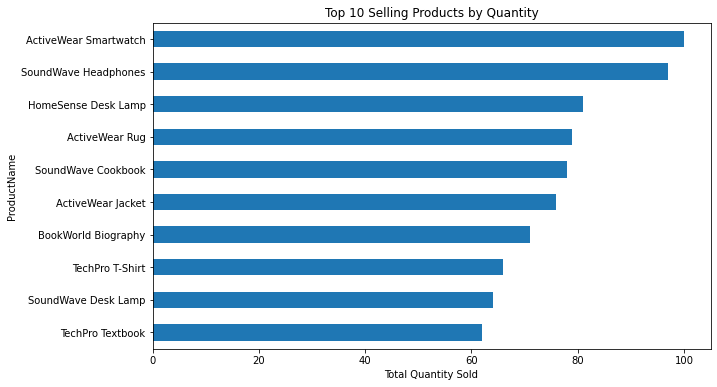

In [23]:
# Plot top 10 products by quantity sold
plt.figure(figsize=(10,6))  
product_quantity.plot(kind='barh')  
plt.title('Top 10 Selling Products by Quantity')  
plt.xlabel('Total Quantity Sold')  
plt.ylabel('ProductName')  
plt.gca().invert_yaxis()  
plt.show()

#### Revenue by Product

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


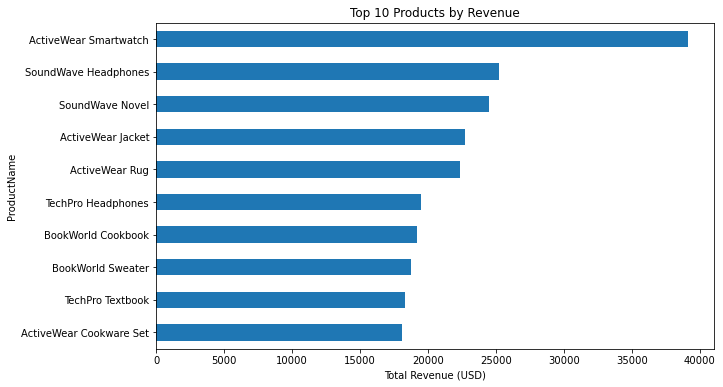

In [24]:
product_revenue = df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)  
print(product_revenue)
plt.figure(figsize=(10,6))  
product_revenue.plot(kind='barh')  
# Plot top 10 products by revenue
plt.title('Top 10 Products by Revenue')  
plt.xlabel('Total Revenue (USD)')  
plt.ylabel('ProductName')  
plt.gca().invert_yaxis()  
plt.show()

### Regional Sales Analysis

#### Total Sales by Region

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


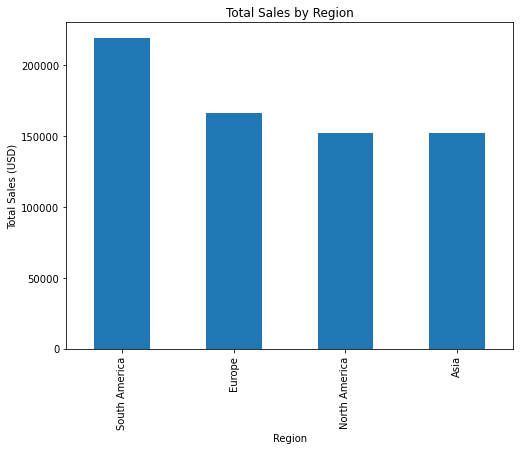

In [25]:
region_sales = df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)  
print(region_sales)
# Plot total sales by region
plt.figure(figsize=(8,6))  
region_sales.plot(kind='bar')  
plt.title('Total Sales by Region')  
plt.xlabel('Region')  
plt.ylabel('Total Sales (USD)')  
plt.show()

#### Average Order Value by Region

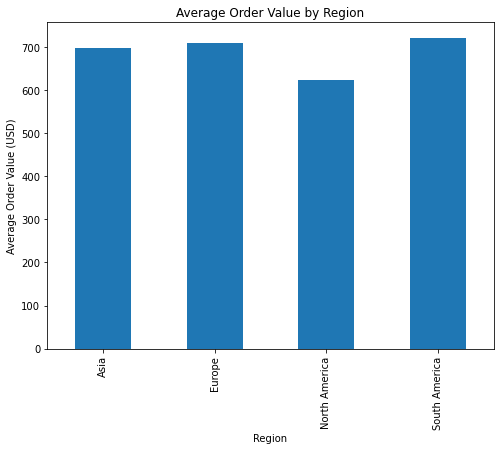

In [26]:
region_avg_order = df.groupby('Region')['TotalValue'].mean()  
# plot average order value by region  
plt.figure(figsize=(8,6))  
region_avg_order.plot(kind='bar')  
plt.title('Average Order Value by Region')  
plt.xlabel('Region')  
plt.ylabel('Average Order Value (USD)')  
plt.show()

### Category-wise Sales

#### Sales by Product Category

Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


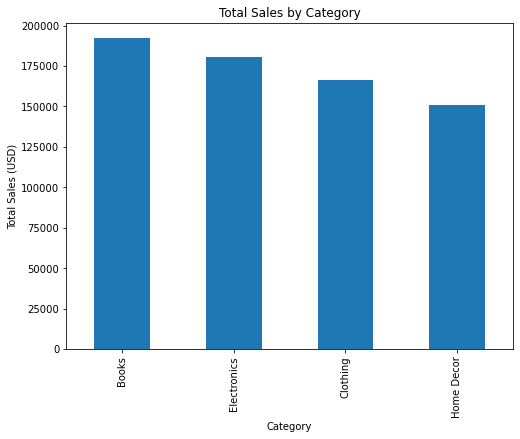

In [27]:
category_sales = df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)  
print(category_sales)  
# Plot total sales by category
plt.figure(figsize=(8,6))  
category_sales.plot(kind='bar')  
plt.title('Total Sales by Category')  
plt.xlabel('Category')  
plt.ylabel('Total Sales (USD)')  
plt.show()

#### Quantity Sold by Category

Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


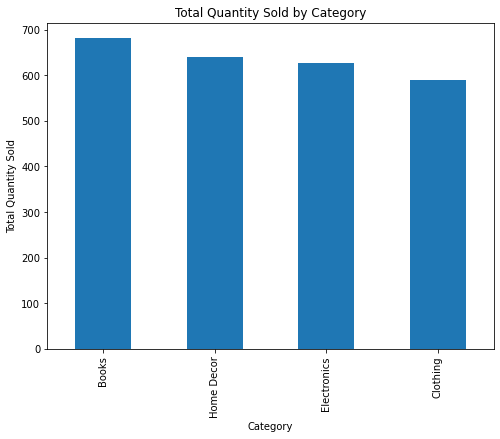

In [28]:
category_quantity = df.groupby('Category')['Quantity'].sum().sort_values(ascending=False)  
print(category_quantity)
# plot quantity sold by category
plt.figure(figsize=(8,6))  
category_quantity.plot(kind='bar')  
plt.title('Total Quantity Sold by Category')  
plt.xlabel('Category')  
plt.ylabel('Total Quantity Sold')  
plt.show()

### Correlation Analysis

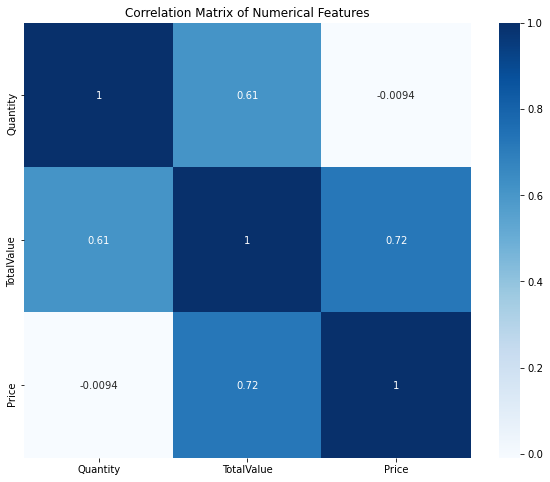

In [29]:
numerical_features = df.select_dtypes(include=[np.number])  
correlation_matrix = numerical_features.corr()  
# Plot correlation matrix  
plt.figure(figsize=(10,8))  
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')  
plt.title('Correlation Matrix of Numerical Features')  
plt.show()